In [57]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [58]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [59]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [80]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [81]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [82]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [83]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x1207a3f60>)
ScalarOutcome('Total Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x1207a3f60>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x1207a3f60>)


In [84]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=10, policies=20)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 10 scenarios * 20 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [01:18<00:00,  2.55it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [85]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,25,91.649169,1.0,0.719848,250.839063,1.0,0.871614,153.629515,10.0,0.881120,...,5,0,9,1,5,9,3,670,650,dikesnet
1,74,293.118539,10.0,0.519775,203.966649,1.5,0.122271,231.962385,1.0,0.437223,...,5,0,9,1,5,9,3,671,650,dikesnet
2,98,192.502165,1.5,0.366923,61.669427,10.0,0.917466,90.007177,10.0,0.201358,...,5,0,9,1,5,9,3,672,650,dikesnet
3,106,36.556246,1.0,0.128178,292.589813,1.0,0.404875,209.334855,1.5,0.503566,...,5,0,9,1,5,9,3,673,650,dikesnet
4,50,238.278970,1.5,0.013981,146.205457,10.0,0.627148,168.979968,1.0,0.101916,...,5,0,9,1,5,9,3,674,650,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,53,279.202899,1.5,0.972891,160.290024,1.0,0.019148,327.249188,1.0,0.620752,...,1,1,6,5,6,3,2,675,669,dikesnet
196,0,165.503681,1.0,0.454752,333.706909,1.5,0.245986,58.367896,10.0,0.335188,...,1,1,6,5,6,3,2,676,669,dikesnet
197,126,155.885320,1.0,0.227859,277.014453,1.5,0.320038,112.577345,1.5,0.035254,...,1,1,6,5,6,3,2,677,669,dikesnet
198,33,344.934550,10.0,0.646229,80.813146,1.5,0.757942,255.425112,1.0,0.798212,...,1,1,6,5,6,3,2,678,669,dikesnet


In [86]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [87]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,5.432510e+05,1.725768e+09,0.000026
1,2.926428e+07,1.725770e+09,0.003861
2,1.450270e+07,1.725768e+09,0.002966
3,1.017718e+07,1.725768e+09,0.000868
4,1.812243e+07,1.725769e+09,0.005363
...,...,...,...
195,3.854314e+06,1.761378e+09,0.000287
196,3.767989e+06,1.761378e+09,0.000774
197,0.000000e+00,1.761377e+09,0.000000
198,8.241415e+05,1.761377e+09,0.000090


In [88]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,25,91.649169,1.0,0.719848,250.839063,1.0,0.871614,153.629515,10.0,0.881120,...,1,5,9,3,670,650,dikesnet,5.432510e+05,1.725768e+09,0.000026
1,74,293.118539,10.0,0.519775,203.966649,1.5,0.122271,231.962385,1.0,0.437223,...,1,5,9,3,671,650,dikesnet,2.926428e+07,1.725770e+09,0.003861
2,98,192.502165,1.5,0.366923,61.669427,10.0,0.917466,90.007177,10.0,0.201358,...,1,5,9,3,672,650,dikesnet,1.450270e+07,1.725768e+09,0.002966
3,106,36.556246,1.0,0.128178,292.589813,1.0,0.404875,209.334855,1.5,0.503566,...,1,5,9,3,673,650,dikesnet,1.017718e+07,1.725768e+09,0.000868
4,50,238.278970,1.5,0.013981,146.205457,10.0,0.627148,168.979968,1.0,0.101916,...,1,5,9,3,674,650,dikesnet,1.812243e+07,1.725769e+09,0.005363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,53,279.202899,1.5,0.972891,160.290024,1.0,0.019148,327.249188,1.0,0.620752,...,5,6,3,2,675,669,dikesnet,3.854314e+06,1.761378e+09,0.000287
196,0,165.503681,1.0,0.454752,333.706909,1.5,0.245986,58.367896,10.0,0.335188,...,5,6,3,2,676,669,dikesnet,3.767989e+06,1.761378e+09,0.000774
197,126,155.885320,1.0,0.227859,277.014453,1.5,0.320038,112.577345,1.5,0.035254,...,5,6,3,2,677,669,dikesnet,0.000000e+00,1.761377e+09,0.000000
198,33,344.934550,10.0,0.646229,80.813146,1.5,0.757942,255.425112,1.0,0.798212,...,5,6,3,2,678,669,dikesnet,8.241415e+05,1.761377e+09,0.000090


[MainProcess/INFO] no time dimension found in results


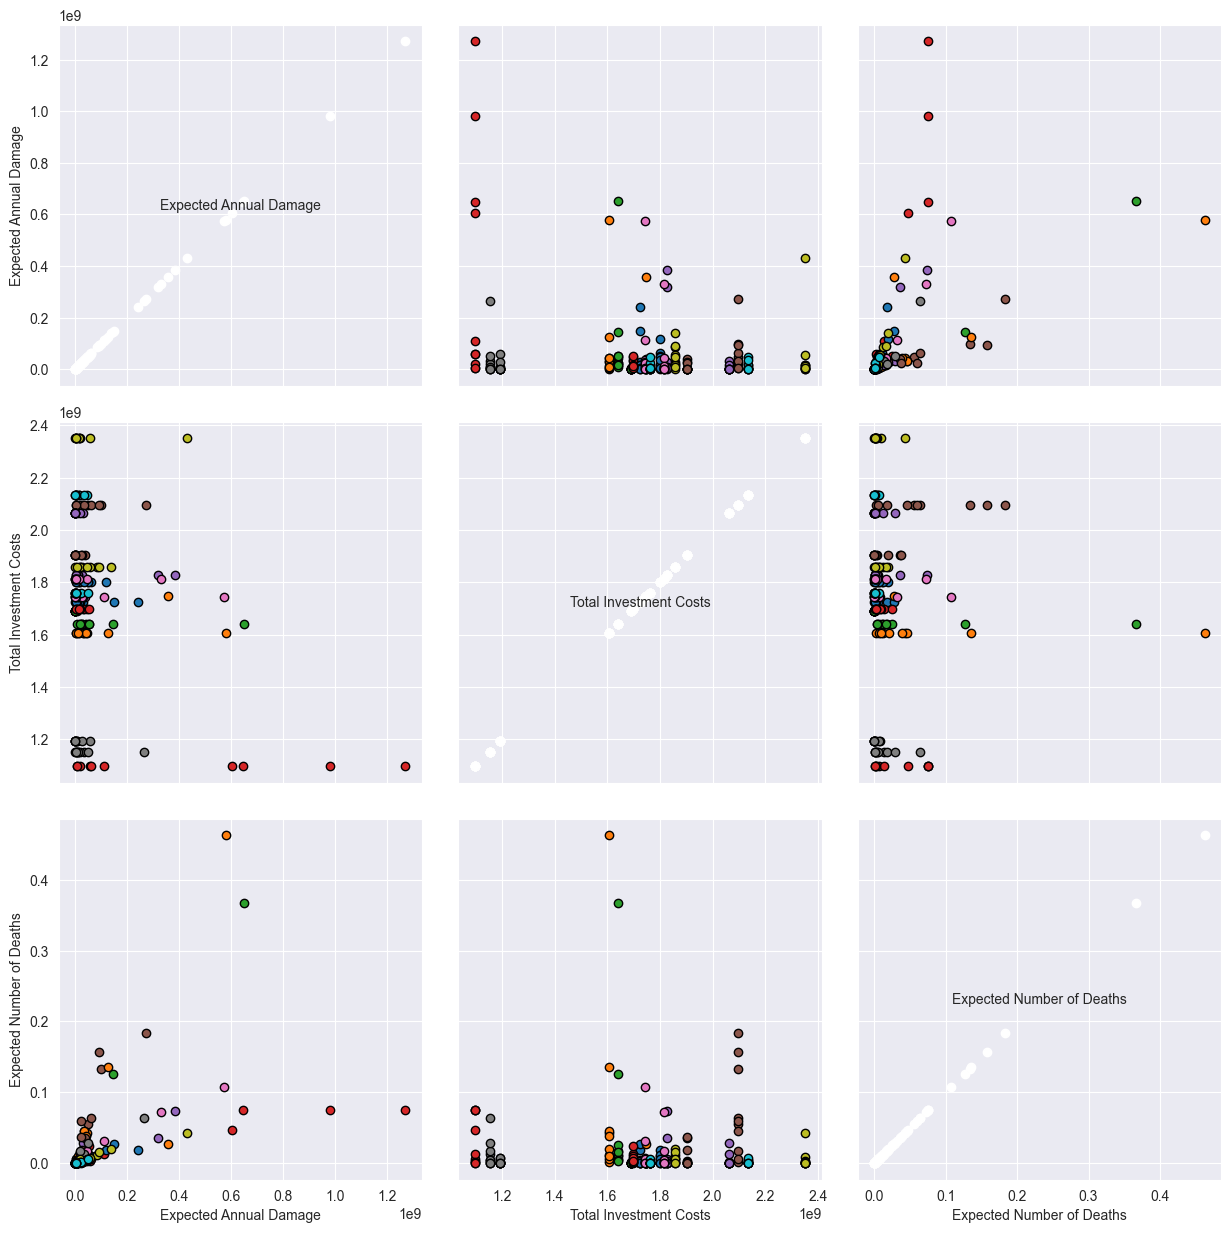

In [89]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [90]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/qb/b4rbb8y50xx3j5vvd_6hpwdr0000gn/T/ipykernel_20626/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
policy,,,,,,,,,,,,,,,,,,,,,
662,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,5.0,8.0,2.0,8.0,3.0,8.0,3.0,7.662295e+05,1.691296e+09,0.000147
669,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,1.0,1.0,6.0,5.0,6.0,3.0,2.0,8.682126e+06,1.761378e+09,0.000950
657,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,10.0,4.0,10.0,10.0,9.0,9.0,2.0,9.971321e+06,1.192765e+09,0.001929
659,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,3.0,3.0,0.0,2.0,3.0,6.0,3.0,1.262907e+07,2.133107e+09,0.002004
651,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,6.0,8.0,7.0,5.0,2.0,10.0,4.0,4.582360e+07,1.746285e+09,0.004071
664,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,2.0,1.0,2.0,10.0,1.0,5.0,0.0,5.602881e+06,2.064181e+09,0.004478
658,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,10.0,5.0,4.0,3.0,7.0,1.0,2.0,5.490145e+07,2.351308e+09,0.006099
650,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,5.0,0.0,9.0,1.0,5.0,9.0,3.0,4.870126e+07,1.725770e+09,0.006283
660,65.5,191.458124,0.485255,191.410259,0.48628,190.547997,0.489185,190.297381,0.51828,187.041351,...,4.0,9.0,4.0,0.0,2.0,0.0,2.0,3.652834e+07,1.801654e+09,0.006422


In [91]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

KeyError: "['RfR Total Costs'] not in index"

In [55]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [15]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:19<00:00, 15.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
experiments, outcomes = results

In [17]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs
0,2.148542e+09,253800000.0
1,1.002035e+09,253800000.0
2,4.563797e+08,253800000.0
3,4.564004e+08,253800000.0
4,3.353403e+08,253800000.0
...,...,...
295,1.366624e+08,369700000.0
296,3.351471e+08,369700000.0
297,2.306869e+07,369700000.0
298,8.200146e+08,369700000.0


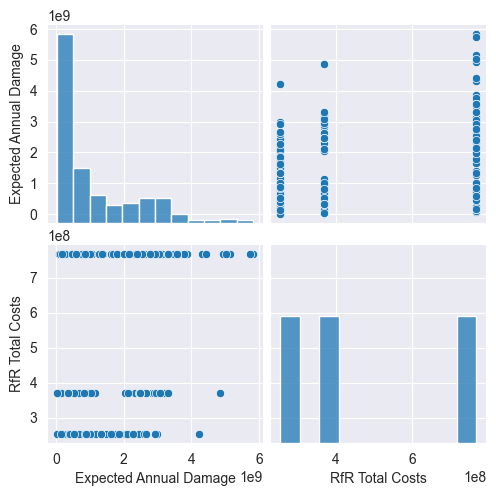

In [18]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

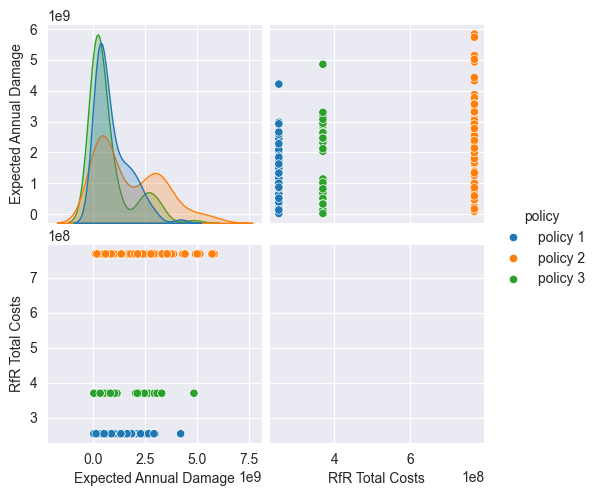

In [19]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()